In [ ]:
pip install scrapy


In [26]:
from scrapy import Selector
import requests

hocam merhaba, scrapelemek istediğim sayfa letterboxd.com

sadece film içerikleri etrafında bir seçme gerçekleştireceğim kişilerin verilerine ya da kişisel listelerine erişmeden sadece katalog üzerinden bir çekim gerçekleştireceğim 

https://letterboxd.com/directors linkleri üzerinden yönetmenlerin filmlerinden listeler oluşturmaya çalışacağım 

robots.txt file'ını inceledim ve yönetmenler sekmesinde bir kısıtlama koymamışlar. bu sebeple sitede trafik oluşturmadan verileri çekmeyi deneyeceğim

***See http://www.robotstxt.org/wc/norobots.html for documentation on how to use the robots.txt file***

 Dark Visitors robots.txt from https://darkvisitors.com/robots-txt-builder

 AI Data Scraper
 https://darkvisitors.com/agents/ai2bot

User-agent: AI2Bot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/applebot-extended

User-agent: Applebot-Extended
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/bytespider

User-agent: Bytespider
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/ccbot

User-agent: CCBot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/claudebot

User-agent: ClaudeBot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/diffbot

User-agent: Diffbot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/cohere-training-data-crawler

User-agent: cohere-training-data-crawler
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/cotoyogi

User-agent: Cotoyogi
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/datenbank-crawler

User-agent: Datenbank Crawler
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/facebookbot

User-agent: FacebookBot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/factset-spyderbot

User-agent: Factset_spyderbot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/google-extended

User-agent: Google-Extended
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/gptbot

User-agent: GPTBot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/icc-crawler

User-agent: ICC-Crawler
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/kangaroo-bot

User-agent: Kangaroo Bot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/meta-externalagent

User-agent: Meta-ExternalAgent
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/netestate-imprint-crawler

User-agent: netEstate Imprint Crawler
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/omgili

User-agent: omgili
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/pangubot

User-agent: PanguBot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/petalbot

User-agent: PetalBot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/semrushbot-ocob

User-agent: SemrushBot-OCOB
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/timpibot

User-agent: Timpibot
Disallow: /

 AI Data Scraper
 https://darkvisitors.com/agents/webzio-extended

User-agent: Webzio-Extended
Disallow: /

 All other crawlers
User-agent: *
Disallow: /*/by/*                     # sorting options
Disallow: /*/popular/this/*           # popularity sorting options
Disallow: /*/on/*                     # availability options
Disallow: /*/tag/*                    # Members? tag lists
Disallow: /*/genre/*                  # Films by genre
Disallow: /*/country/*                # Films by country
Disallow: /*/language/*               # Films by language
Disallow: /*/decade/*                 # Films by decade
Disallow: /films/year/*               # Films by year
Disallow: /films/*/year/*             # Films by year
Disallow: /films/*/size/large/*       # Films with large posters (and therefore stats)

# sitenin yapısı

veritabanı içerisinde tüm türler, tüm ülkeler ve tüm yıllara göre filtreleyebileceğimiz 417 sayfalık her sayfada 24 film olan bir katalog



In [88]:
from scrapy import Selector

import requests

url= 'https://letterboxd.com'
html=requests.get(url).content
sel=Selector(text=html)


In [89]:
print(len(sel.xpath("//*")))

1596


In [ ]:
html

İlk iş olarak yönetmenlerin sayfalarındaki filmlerin isimlerinden bir liste oluşturmaya çalışıp daha sonrasında yönetmen sayfasında bulunan ** decade, genre, service ve sort by popularity ** filtreleriyle birbirinden farklı örnekler çekmeye çalışacağım.

En son da verilmiş bir yönetmen listesinden bana farklı filtrelerle filmleri çekmesini isteyeceğim

In [5]:
#ilk olarak Agnès Varda'nın filmlerini çekeceğim
url='https://letterboxd.com/director/agnes-varda/'
html= requests.get(url).content
sel=Selector(text=html)
print("filtrelenmiş bu kadar veri buldun:", len(sel.xpath("//*")))

filtrelenmiş bu kadar veri buldun: 1441


In [ ]:
html

Hocam siteyi biraz kurcalardıktan sonra isimleri hem sırasız listenin(ul) kendisinden hem de liste maddesinin içindeki konteynerdaki (li/div) element attributelarından çekebileceğimi farkettim.

In [6]:
xpath_for_titles_of_works='//*[@id="content"]/div/div/section/div[2]/ul/li/div/@data-item-name'
titles_of_works=sel.xpath(xpath_for_titles_of_works).extract()
titles_of_works

['Cléo from 5 to 7 (1962)',
 'Vagabond (1985)',
 'Le Bonheur (1965)',
 'The Gleaners and I (2000)',
 'Faces Places (2017)',
 'The Beaches of Agnès (2008)',
 "One Sings, the Other Doesn't (1977)",
 'Black Panthers (1968)',
 'La Pointe Courte (1955)',
 'Jane B. by Agnès V. (1988)',
 'Varda by Agnès (2019)',
 'Along the Coast (1958)',
 'Uncle Yanco (1967)',
 'Hello Cubans (1963)',
 'Daguerréotypes (1975)',
 'Jacquot de Nantes (1991)',
 'One Hundred and One Nights (1995)',
 'Women Reply (1975)',
 'Mur Murs (1981)',
 'Kung-Fu Master! (1988)',
 'Lions Love (1969)',
 'Diary of a Pregnant Woman (1958)',
 'Far from Vietnam (1967)',
 'Documenteur (1981)',
 'The Creatures (1966)',
 'Fiancés on the Bridge (1962)',
 'Ulysse (1983)',
 'The Pleasure of Love in Iran (1976)',
 "You've Got Beautiful Stairs, You Know... (1986)",
 'The Young Girls Turn 25 (1993)',
 'Agnès Varda: From Here to There (2011)',
 'Tribute to Zgougou the Cat (2002)',
 'The So-Called Caryatids (1984)',
 'The Gleaners and I: Two Y

In [7]:
xpath_for_titles_of_works='//*[@id="content"]/div/div/section/div[2]/ul/li[@title]/@title'
titles_of_works=sel.xpath(xpath_for_titles_of_works).getall()
titles_of_works

['Cléo from 5 to 7 (1962)',
 'Vagabond (1985)',
 'Le Bonheur (1965)',
 'The Gleaners and I (2000)',
 'Faces Places (2017)',
 'The Beaches of Agnès (2008)',
 "One Sings, the Other Doesn't (1977)",
 'Black Panthers (1968)',
 'La Pointe Courte (1955)',
 'Jane B. by Agnès V. (1988)',
 'Varda by Agnès (2019)',
 'Along the Coast (1958)',
 'Uncle Yanco (1967)',
 'Hello Cubans (1963)',
 'Daguerréotypes (1975)',
 'Jacquot de Nantes (1991)',
 'One Hundred and One Nights (1995)',
 'Women Reply (1975)',
 'Mur Murs (1981)',
 'Kung-Fu Master! (1988)',
 'Lions Love (1969)',
 'Diary of a Pregnant Woman (1958)',
 'Far from Vietnam (1967)',
 'Documenteur (1981)',
 'The Creatures (1966)',
 'Fiancés on the Bridge (1962)',
 'Ulysse (1983)',
 'The Pleasure of Love in Iran (1976)',
 "You've Got Beautiful Stairs, You Know... (1986)",
 'The Young Girls Turn 25 (1993)',
 'Agnès Varda: From Here to There (2011)',
 'Tribute to Zgougou the Cat (2002)',
 'The So-Called Caryatids (1984)',
 'The Gleaners and I: Two Y

Ayrıca web sitesi link üzerinden yönlendirdiği için filme, filmlerin kendi linkleri de HTML'in içinde bulunuyor fakat burdaki a elementi sonradan javascript ile eklenmis o sebeple requests ve selectorle çekemiyorum ama yapıyı izlediğim zaman itemin ismini bulabildim


//*[@id="content"]/div/div/section/div[2]/ul/li[1]/div/div/a

//*[@id="content"]/div/div/section/div[2]/ul/li[2]/div/div/a

> //*[@id="content"]/div/div/section/div[2]/ul/li/div/div/a

önceki div elemanını çekince a'nın 

In [8]:
xpath_for_links_of_works='//*[@id="content"]/div/div/section/div[2]/ul/li/div/div//*'
links_of_works=sel.xpath(xpath_for_links_of_works).extract()
links_of_works

['<img src="https://s.ltrbxd.com/static/img/empty-poster-150-DtnLDE3k.png" class="image" width="150" height="225" alt="Cléo from 5 to 7">',
 '<span class="frame"><span class="frame-title"></span></span>',
 '<span class="frame-title"></span>',
 '<img src="https://s.ltrbxd.com/static/img/empty-poster-150-DtnLDE3k.png" class="image" width="150" height="225" alt="Vagabond">',
 '<span class="frame"><span class="frame-title"></span></span>',
 '<span class="frame-title"></span>',
 '<img src="https://s.ltrbxd.com/static/img/empty-poster-150-DtnLDE3k.png" class="image" width="150" height="225" alt="Le Bonheur">',
 '<span class="frame"><span class="frame-title"></span></span>',
 '<span class="frame-title"></span>',
 '<img src="https://s.ltrbxd.com/static/img/empty-poster-150-DtnLDE3k.png" class="image" width="150" height="225" alt="The Gleaners and I">',
 '<span class="frame"><span class="frame-title"></span></span>',
 '<span class="frame-title"></span>',
 '<img src="https://s.ltrbxd.com/static/

HTML kodunu decode edip baktığım zaman 

***data-item-name="Cléo from 5 to 7 (1962)" data-item-slug="cleo-from-5-to-7" data-item-link="/film/cleo-from-5-to-7/"***

slug ve linkin bu attributelarda saklandığını öğrendim.

HTML kodunda da filmler li ile ayrıldığı için listeden sonraki kısımda bu itemi aradım

In [ ]:
html.decode()

In [9]:
xpath_for_links_of_works='//*[@id="content"]/div/div/section/div[2]/ul/li//@data-item-link'
links_of_works=sel.xpath(xpath_for_links_of_works).extract()
links_of_works

['/film/cleo-from-5-to-7/',
 '/film/vagabond/',
 '/film/happiness-1965/',
 '/film/the-gleaners-and-i/',
 '/film/faces-places/',
 '/film/the-beaches-of-agnes/',
 '/film/one-sings-the-other-doesnt/',
 '/film/black-panthers/',
 '/film/la-pointe-courte/',
 '/film/jane-b-by-agnes-v/',
 '/film/varda-by-agnes/',
 '/film/along-the-coast/',
 '/film/uncle-yanco/',
 '/film/hello-cubans/',
 '/film/daguerreotypes/',
 '/film/jacquot-de-nantes/',
 '/film/one-hundred-and-one-nights/',
 '/film/women-reply/',
 '/film/mur-murs/',
 '/film/kung-fu-master/',
 '/film/lions-love/',
 '/film/diary-of-a-pregnant-woman/',
 '/film/far-from-vietnam/',
 '/film/documenteur/',
 '/film/the-creatures/',
 '/film/fiances-on-the-bridge/',
 '/film/ulysse/',
 '/film/the-pleasure-of-love-in-iran/',
 '/film/youve-got-beautiful-stairs-you-know/',
 '/film/the-young-girls-turn-25/',
 '/film/agnes-varda-from-here-to-there/',
 '/film/tribute-to-zgougou-the-cat/',
 '/film/the-so-called-caryatids/',
 '/film/the-gleaners-and-i-two-yea

In [10]:
first_part_url = "https://letterboxd.com/" 

In [11]:
link_merged=[]

for i in links_of_works:
    link = first_part_url + i
    link_merged.append(link)

link_merged

['https://letterboxd.com//film/cleo-from-5-to-7/',
 'https://letterboxd.com//film/vagabond/',
 'https://letterboxd.com//film/happiness-1965/',
 'https://letterboxd.com//film/the-gleaners-and-i/',
 'https://letterboxd.com//film/faces-places/',
 'https://letterboxd.com//film/the-beaches-of-agnes/',
 'https://letterboxd.com//film/one-sings-the-other-doesnt/',
 'https://letterboxd.com//film/black-panthers/',
 'https://letterboxd.com//film/la-pointe-courte/',
 'https://letterboxd.com//film/jane-b-by-agnes-v/',
 'https://letterboxd.com//film/varda-by-agnes/',
 'https://letterboxd.com//film/along-the-coast/',
 'https://letterboxd.com//film/uncle-yanco/',
 'https://letterboxd.com//film/hello-cubans/',
 'https://letterboxd.com//film/daguerreotypes/',
 'https://letterboxd.com//film/jacquot-de-nantes/',
 'https://letterboxd.com//film/one-hundred-and-one-nights/',
 'https://letterboxd.com//film/women-reply/',
 'https://letterboxd.com//film/mur-murs/',
 'https://letterboxd.com//film/kung-fu-master/

In [12]:
import pandas as pd

movies_and_links={"titles": titles_of_works,
                  "links": link_merged}
table_of_movies=pd.DataFrame(movies_and_links)
table_of_movies

,titles,links
0,Cléo from 5 to 7 (1962),https://letterboxd.com//film/cleo-from-5-to-7/
1,Vagabond (1985),https://letterboxd.com//film/vagabond/
2,Le Bonheur (1965),https://letterboxd.com//film/happiness-1965/
3,The Gleaners and I (2000),https://letterboxd.com//film/the-gleaners-and-i/
4,Faces Places (2017),https://letterboxd.com//film/faces-places/
...,...,...
73,Le Bonheur? Réponses des Fontenaisiens (2006),https://letterboxd.com//film/le-bonheur-repons...
74,Les deux femmes du Bonheur (2006),https://letterboxd.com//film/les-deux-femmes-d...
75,Bonheur: nom propre ou concept (2006),https://letterboxd.com//film/bonheur-nom-propr...
76,Jean-Claude Drouot revient à Fontenay-aux-Rose...,https://letterboxd.com//film/jean-claude-drouo...


Hocam film rantinglerini de çekmek istedim fakat klasik HTML içinde görünmüyor, JSON-LD <scripttype="application/ld+json"> içinde gömülü bir şekilde yazılmış. kod içerisinde bulabildim ama nasıl çekeceğime bakınca beautifulsoup ile falan çekebileceğimi söyledi ama banlanacağımdan korktuğum için vazgeçtim. ama sayfa sayfa gezip kolayca çekebileceğim orijinal ismine bakacağım.


//*[@id="film-page-wrapper"]/div[2]/section[1]/div/div/h2/em
//*[@id="film-page-wrapper"]/div[2]/section[1]/div/div/h2/em



In [13]:
url='https://letterboxd.com/film/cleo-from-5-to-7/'
html= requests.get(url).content
sel=Selector(text=html)
print("Cleo 5'ten 7'ye", len(sel.xpath("//*")))

Cleo 5'ten 7'ye 1794


In [14]:
xpath_for_ogtitles_of_works='//*[@id="film-page-wrapper"]/div[2]/section[1]/div/div/h2/em/text()'
ogtitles_of_works=sel.xpath(xpath_for_ogtitles_of_works).extract()
ogtitles_of_works

['Cléo de 5 à 7']

In [23]:
og_names=[]

for i in range(len(table_of_movies)):
    url=table_of_movies['links'][i] 
    html=requests.get(url).content
    sel=Selector(text=html)
    names_og=sel.xpath(xpath_for_ogtitles_of_works).getall()
    
    if names_og:  
        for j in names_og:
            og_names.append(j)
    else:
        og_names.append(table_of_movies['titles'][i][:-6])

In [24]:
og_names

['Cléo de 5 à 7',
 'Sans toit ni loi',
 'Le Bonheur ',
 'Les Glaneurs et la Glaneuse',
 'Visages, villages',
 "Les Plages d'Agnès",
 "One Sings, the Other Doesn't ",
 'Black Panthers ',
 'La Pointe Courte ',
 'Jane B. by Agnès V. ',
 'Varda by Agnès ',
 'Along the Coast ',
 'Uncle Yanco ',
 'Hello Cubans ',
 'Daguerréotypes ',
 'Jacquot de Nantes ',
 'One Hundred and One Nights ',
 'Women Reply ',
 'Mur Murs ',
 'Kung-Fu Master! ',
 'Lions Love ',
 "L'Opéra-Mouffe",
 'Loin du Vietnam',
 'Documenteur ',
 'The Creatures ',
 'Fiancés on the Bridge ',
 'Ulysse ',
 'The Pleasure of Love in Iran ',
 "You've Got Beautiful Stairs, You Know... ",
 'The Young Girls Turn 25 ',
 'Agnès Varda: From Here to There ',
 'Tribute to Zgougou the Cat ',
 'The So-Called Caryatids ',
 'The Gleaners and I: Two Years Later ',
 'O Seasons, O Castles ',
 'Pier Paolo Pasolini - Agnès Varda - New York - 1967 ',
 'The World of Jacques Demy ',
 'The Vanishing Lion ',
 'Les 3 Boutons ',
 'Elsa the Rose ',
 'Seven Ro

In [26]:
table_of_movies["les noms"]=og_names

In [27]:
table_of_movies


,titles,links,les noms
0,Cléo from 5 to 7 (1962),https://letterboxd.com//film/cleo-from-5-to-7/,Cléo de 5 à 7
1,Vagabond (1985),https://letterboxd.com//film/vagabond/,Sans toit ni loi
2,Le Bonheur (1965),https://letterboxd.com//film/happiness-1965/,Le Bonheur
3,The Gleaners and I (2000),https://letterboxd.com//film/the-gleaners-and-i/,Les Glaneurs et la Glaneuse
4,Faces Places (2017),https://letterboxd.com//film/faces-places/,"Visages, villages"
...,...,...,...
73,Le Bonheur? Réponses des Fontenaisiens (2006),https://letterboxd.com//film/le-bonheur-repons...,Le Bonheur? Réponses des Fontenaisiens
74,Les deux femmes du Bonheur (2006),https://letterboxd.com//film/les-deux-femmes-d...,Les deux femmes du Bonheur
75,Bonheur: nom propre ou concept (2006),https://letterboxd.com//film/bonheur-nom-propr...,Bonheur: nom propre ou concept
76,Jean-Claude Drouot revient à Fontenay-aux-Rose...,https://letterboxd.com//film/jean-claude-drouo...,Jean-Claude Drouot revient à Fontenay-aux-Rose...


eğer decadelere göre filtreleyip her decadedeki filmleri kendi başına bir liste oluştursaydık

https://letterboxd.com/director/agnes-varda/decade/1970s/

https://letterboxd.com/director/agnes-varda/decade/1980s/


//*[@id="content"]/div/div/section/section[2]/p


//*[@id="content"]/div/div/section/div[2]/ul/li[@title]/@title

In [36]:
decades=["1960s","1970s","1980s","1990s","2000s", "2010s"]

In [37]:
firstpart="https://letterboxd.com/director/agnes-varda/decade/"

sixties=[]
seventies = []
eighties = []
nineties = []
two_thousands = []
twenty_tens = []

for decade in decades:
    url = firstpart + decade + "/"
    html = requests.get(url).content
    sel = Selector(text=html)
    xpath_for_titles_of_decades = '//*[@id="content"]/div/div/section/div[2]/ul/li[@title]/@title'
    films = sel.xpath(xpath_for_titles_of_decades).extract()
    
    for j in films:
        if decade == "1970s":
            seventies.append(j)
        elif decade == "1980s":
            eighties.append(j)
        elif decade == "1990s":
            nineties.append(j)
        elif decade == "2000s":
            two_thousands.append(j)
        elif decade == "2010s":
            twenty_tens.append(j)
        else:
            sixties.append(j)


In [38]:
sixties=pd.Series(sixties)
seventies=pd.Series(seventies)
eighties = pd.Series(eighties)
nineties = pd.Series(nineties)
two_thousands = pd.Series(two_thousands)
twenty_tens = pd.Series(twenty_tens)

In [39]:
display(sixties,seventies, eighties, nineties,two_thousands, twenty_tens)

0           Cléo from 5 to 7 (1962)
1                 Le Bonheur (1965)
2             Black Panthers (1968)
3                Uncle Yanco (1967)
4               Hello Cubans (1963)
5                 Lions Love (1969)
6           Far from Vietnam (1967)
7              The Creatures (1966)
8      Fiancés on the Bridge (1962)
9              Elsa the Rose (1966)
10          Christmas Carole (1966)
11    The Children of Museum (1964)
12              La Mélangite (1960)
dtype: object

0    One Sings, the Other Doesn't (1977)
1                  Daguerréotypes (1975)
2                     Women Reply (1975)
3    The Pleasure of Love in Iran (1976)
4                        Nausicaa (1971)
dtype: object

0                                     Vagabond (1985)
1                          Jane B. by Agnès V. (1988)
2                                     Mur Murs (1981)
3                              Kung-Fu Master! (1988)
4                                  Documenteur (1981)
5                                       Ulysse (1983)
6     You've Got Beautiful Stairs, You Know... (1986)
7                      The So-Called Caryatids (1984)
8     Seven Rooms, Kitchen, Bathroom, for Sale (1984)
9                     One Minute for One Image (1983)
10                         a Nathalie Sarraute (1986)
dtype: object

0             Jacquot de Nantes (1991)
1    One Hundred and One Nights (1995)
2       The Young Girls Turn 25 (1993)
3     The World of Jacques Demy (1995)
dtype: object

0                             The Gleaners and I (2000)
1                           The Beaches of Agnès (2008)
2                     Tribute to Zgougou the Cat (2002)
3            The Gleaners and I: Two Years Later (2002)
4                             The Vanishing Lion (2003)
5                     Ydessa, the Bears and etc. (2004)
6     Cléo from 5 to 7: Remembrances and Anecdotes (...
7     The Little Story of Gwen from French Brittany ...
8                           Rue Daguerre in 2005 (2005)
9     Vagabond: Remembrances, Interviews, Notes and ...
10                    Some Widows of Noirmoutier (2006)
11                      More So-called Caryatids (2005)
12                      The Story of an Old Lady (2003)
13                                Cinévardaphoto (2004)
14             Agnès Tells a Sad and Happy Story (2008)
15                      Souvenirs and Evocations (2008)
16                                   Bord de mer (2009)
17                    Bread, Painting, Accordion

Series([], dtype: object)

In [40]:
table_of_movies["decade"] = None

table_of_movies.loc[table_of_movies["titles"].isin(sixties), "decade"] = "60s"
table_of_movies.loc[table_of_movies["titles"].isin(seventies), "decade"] = "70s"
table_of_movies.loc[table_of_movies["titles"].isin(eighties), "decade"] = "80s"
table_of_movies.loc[table_of_movies["titles"].isin(nineties), "decade"] = "90s"
table_of_movies.loc[table_of_movies["titles"].isin(two_thousands), "decade"] = "2000s"
table_of_movies.loc[table_of_movies["titles"].isin(twenty_tens), "decade"] = "2010s"


In [41]:
table_of_movies

,titles,links,les noms,decade
0,Cléo from 5 to 7 (1962),https://letterboxd.com//film/cleo-from-5-to-7/,Cléo de 5 à 7,60s
1,Vagabond (1985),https://letterboxd.com//film/vagabond/,Sans toit ni loi,80s
2,Le Bonheur (1965),https://letterboxd.com//film/happiness-1965/,Le Bonheur,60s
3,The Gleaners and I (2000),https://letterboxd.com//film/the-gleaners-and-i/,Les Glaneurs et la Glaneuse,2000s
4,Faces Places (2017),https://letterboxd.com//film/faces-places/,"Visages, villages",None
...,...,...,...,...
73,Le Bonheur? Réponses des Fontenaisiens (2006),https://letterboxd.com//film/le-bonheur-repons...,Le Bonheur? Réponses des Fontenaisiens,2000s
74,Les deux femmes du Bonheur (2006),https://letterboxd.com//film/les-deux-femmes-d...,Les deux femmes du Bonheur,2000s
75,Bonheur: nom propre ou concept (2006),https://letterboxd.com//film/bonheur-nom-propr...,Bonheur: nom propre ou concept,2000s
76,Jean-Claude Drouot revient à Fontenay-aux-Rose...,https://letterboxd.com//film/jean-claude-drouo...,Jean-Claude Drouot revient à Fontenay-aux-Rose...,2000s


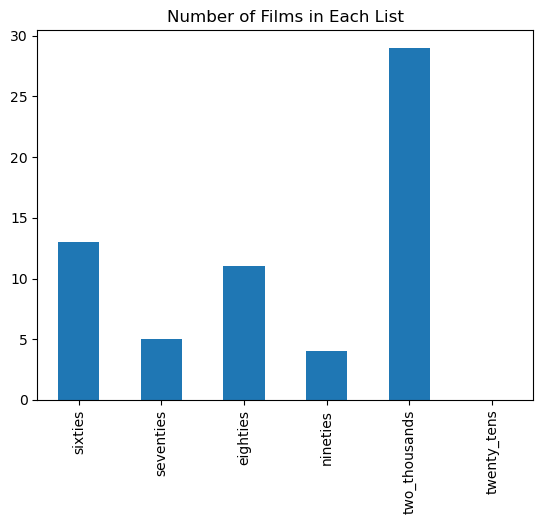

In [43]:
import matplotlib.pyplot as plt

counts = pd.Series({
    "sixties":len(sixties),
    "seventies": len(seventies),
    "eighties": len(eighties),
    "nineties": len(nineties),
    "two_thousands": len(two_thousands),
    "twenty_tens": len(twenty_tens)
})

counts.plot(kind="bar")
plt.title("Number of Films in Each List")
plt.show()

* peki input vermek istesek direkt yönetmenlerin isimlerini kurala göre gördiklerinde tüm filmleri çekilsin
* ve sayfa sayfa gezip filmlerin açıklamalarını da çeksin


# all combined

içeriye ingilizce karakterler ve isim soy isim arasına tire koyarak bir yönetmen inputu verelim.

dikkat edilemsi gereken yer description her sayfada aynı yere işlenmiş değil tagline'ı olan filmlerde 1. gibi olmayanlarda 2.si olarak işleniyor

    //*[@id="film-page-wrapper"]/div[2]/section[2]/section/div[1]/div/p
    
    //*[@id="film-page-wrapper"]/div[2]/section[2]/section/div/div[2]/p

In [98]:
from scrapy import Selector
import requests
import time

director = input("Director (ex: agnes-varda): ")

url = 'https://letterboxd.com/director/' + director+ '/'
html = requests.get(url).content
sel = Selector(text=html)

xpath_for_titles_of_works = '//*[@id="content"]/div/div/section/div[2]/ul/li/div/@data-item-name'
titles_of_works = sel.xpath(xpath_for_titles_of_works).extract()



xpath_for_links_of_works = '//*[@id="content"]/div/div/section/div[2]/ul/li//@data-item-link'
links_of_works = sel.xpath(xpath_for_links_of_works).extract()

link_merged = []
first_part_url = "https://letterboxd.com/"

for i in links_of_works:
    link = first_part_url + i
    link_merged.append(link)




descriptions = []

for i in range(len(link_merged)):
    url = link_merged[i]
    html = requests.get(url).content
    sel = Selector(text=html)

    xpath_desc_1 = '//*[@id="film-page-wrapper"]/div[2]/section[2]/section/div[1]/div/p/text()'
    xpath_desc_2 = '//*[@id="film-page-wrapper"]/div[2]/section[2]/section/div/div[2]/p/text()'

    moviedesc = sel.xpath(xpath_desc_1).extract()
    if not moviedesc:
        moviedesc = sel.xpath(xpath_desc_2).extract()

    if moviedesc:
        descriptions.append(moviedesc[0])
    else:
        descriptions.append("no description available!!!")




Director (ex: agnes-varda):  xavier-dolan


In [110]:
descriptions[:5]

['A peculiar neighbor offers hope to a recent widow who is struggling to raise a teenager who is unpredictable and, sometimes, violent.',
 'Hubert, a brash 17-year-old, is confused and torn by a love-hate relationship with his mother that consumes him more and more each day. After distressing ordeals and tragic episodes, Hubert will find his mother on the banks of Saint Lawrence river, where he grew up, and where a murder will be committed: the murder of childhood.',
 'The story of an impossible love between a woman named Fred and a transgender woman named Laurence who reveals her inner desire to become her true self.',
 'Two childhood best friends are asked to share a kiss for the purposes of a student short film. Soon, a lingering doubt sets in, confronting both men with their preferences, threatening the brotherhood of their social circle, and, eventually, changing their lives.',
 'Louis, a terminally ill writer, returns home after a long absence to tell his family that he is dying.

In [111]:
#tekrardan orijinal isimlerini eklemek istersek

og_names=[]

for i in range(len(link_merged)):
    url=link_merged[i] 
    html=requests.get(url).content
    sel=Selector(text=html)

    xpath_for_ogtitles_of_works='//*[@id="film-page-wrapper"]/div[2]/section[1]/div/div/h2/em/text()'

    
    names_og=sel.xpath(xpath_for_ogtitles_of_works).getall()
    
    if names_og:  
        for j in names_og:
            og_names.append(j)
        else:
            og_names.append(titles_of_works[i][:-6])

In [112]:
og_names

["J'ai tué ma mère",
 'I Killed My Mother ',
 'Juste la fin du monde',
 "It's Only the End of the World ",
 'Les amours imaginaires',
 'Heartbeats ',
 'Tom à la ferme',
 'Tom at the Farm ',
 "La nuit où Laurier Gaudreault s'est réveillé",
 'The Night Logan Woke Up ']

In [113]:
import pandas as pd
sellected_director_output=pd.DataFrame({"name":titles_of_works,"original names":og_names,"descriptions":descriptions,"link":link_merged})

In [114]:
sellected_director_output.head(5)

,name,original names,descriptions,link
0,Mommy (2014),J'ai tué ma mère,A peculiar neighbor offers hope to a recent wi...,https://letterboxd.com//film/mommy-2014/
1,I Killed My Mother (2009),I Killed My Mother,"Hubert, a brash 17-year-old, is confused and t...",https://letterboxd.com//film/i-killed-my-mother/
2,Laurence Anyways (2012),Juste la fin du monde,The story of an impossible love between a woma...,https://letterboxd.com//film/laurence-anyways/
3,Matthias & Maxime (2019),It's Only the End of the World,Two childhood best friends are asked to share ...,https://letterboxd.com//film/matthias-maxime/
4,It's Only the End of the World (2016),Les amours imaginaires,"Louis, a terminally ill writer, returns home a...",https://letterboxd.com//film/its-only-the-end-...
